In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# API Key
from config import apikey

In [185]:
stocks_df=pd.read_csv("500_stock_export.csv")
stocks_df=pd.DataFrame(stocks_df)
stocks_df.head()

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13


In [186]:
hardcode_weeks = ["2019-10-04", "2019-10-11","2019-10-18", "2019-10-25", "2019-11-01", "2019-11-08",
                  "2019-11-15", "2019-11-22", "2019-11-29", "2019-12-06", "2019-12-13", "2019-12-20",
                  "2019-12-27", "2020-01-03", "2020-01-10", "2020-01-17", "2020-01-24", "2020-01-31",
                  "2020-02-07", "2020-02-14", "2020-02-21", "2020-02-28", "2020-03-06", "2020-03-13"]

In [318]:
cd_df = stocks_df.loc[stocks_df['Sector'] == 'Consumer Discretionary']

In [328]:
cddate_df=cd_df.set_index(['Symbol'])
cddate_df=cddate_df.dropna()
cddate_df=cddate_df.drop(['Unnamed: 0', 'Sector', 'Name'], axis=1)
cddate_df.head()

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Symbol,,,,,,,,,,,,,,,,,,,,,
AAP,159.94,158.56,163.50,165.56,164.82,167.40,162.66,157.87,157.08,154.62,...,151.05,141.68,131.75,132.93,133.59,140.61,132.98,127.91,113.69,46.25
AMZN,1739.65,1731.92,1757.51,1761.33,1791.44,1785.88,1739.49,1745.72,1800.80,1751.60,...,1864.72,1861.64,2008.72,2079.28,2134.87,2095.97,1883.75,1901.09,1785.00,-45.35
APTV,83.43,86.26,88.96,89.58,92.35,96.88,92.31,91.47,93.88,93.77,...,91.53,91.54,84.79,87.13,88.32,90.07,78.11,76.29,66.47,16.96
AZO,1060.33,1085.97,1110.00,1129.47,1156.28,1165.86,1171.88,1163.87,1177.92,1172.66,...,1154.58,1140.23,1057.96,1058.91,1053.21,1068.03,1032.51,1060.31,1012.73,47.60
BBY,66.89,69.53,70.52,73.15,72.92,76.85,77.09,72.64,80.64,82.05,...,89.94,89.44,84.69,87.02,90.21,90.26,75.65,73.82,61.06,5.83


In [329]:
cddate_df=cddate_df.swapaxes("index", "columns") 
cddate_df=cddate_df.reset_index()
cddate_df=cddate_df.rename(columns={"index": "date_range"})


In [330]:
cddate = cddate_df.index.astype('O')

In [331]:
new_dict = {"date_range":[], "value":[]}
rowNum = 0
for index, row in cddate_df[:-2].iterrows():
    for x in range(len(cddate_df.columns)-1):
        new_dict["date_range"].append(index)
        value = cddate_df.iloc[rowNum+1,x+1] - cddate_df.iloc[rowNum,x+1]
        new_dict["value"].append(value)
    rowNum = rowNum + 1

In [332]:
scatter_df = pd.DataFrame(new_dict)
scatter_df.head()

,date_range,value
0,0,-1.38
1,0,-7.73
2,0,2.83
3,0,25.64
4,0,2.64


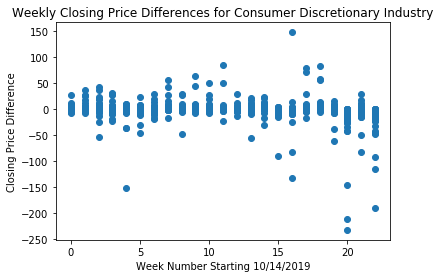

In [333]:
plt.scatter(scatter_df['date_range'],scatter_df['value'])
plt.title("Weekly Closing Price Differences for Consumer Discretionary Industry")
plt.ylabel("Closing Price Difference")
plt.xlabel("Week Number Starting 10/14/2019")
plt.show()

In [334]:
cleaned_stocks=stocks_df.dropna()
cleaned_stocks=cleaned_stocks.drop(['Unnamed: 0'], axis=1)
cleaned_stocks.head()

sector_df=cleaned_stocks.groupby("Sector").mean()
sector_df.head(11)

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,150.975779,152.346623,154.383571,155.682468,156.319610,154.446039,153.821948,153.502597,156.032727,156.328571,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.200130,124.656039,26.319740
Consumer Staples,92.192167,91.533667,91.195833,90.782000,90.512667,90.793333,91.333333,91.538333,92.429333,93.057833,...,95.707667,95.204500,93.748000,95.787500,96.808333,96.178667,85.963000,91.549000,83.497333,8.694833
Energy,46.462593,47.197778,46.100741,48.623333,48.590000,49.938148,49.339259,48.618148,47.780741,48.567407,...,51.454074,48.728519,45.801852,46.324074,46.590000,46.731481,39.348519,35.187407,25.294074,21.168519
Financials,92.388333,92.811905,93.571905,94.597302,96.402143,98.492698,98.666349,98.798889,99.663651,100.096667,...,103.739683,102.195873,101.173016,104.230635,105.766667,104.361270,89.908095,87.252381,77.146984,15.241349
Health Care,155.743909,155.795818,159.419000,160.992273,165.174000,165.438364,169.808273,171.283818,173.360545,175.027636,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,-1.046455
Industrials,123.872109,125.941797,126.794375,129.086953,130.892656,132.775625,133.845000,133.004609,133.615938,132.783203,...,139.756094,138.620469,134.233750,137.693438,139.265312,137.736719,121.281250,119.519375,104.808281,19.063828
Information Technology,147.868881,149.027015,148.894179,151.500522,153.646119,156.361791,158.810746,156.718358,159.281045,159.450448,...,174.562687,174.548358,168.712836,174.194627,179.186567,175.416119,157.667910,155.551940,144.333955,3.534925
Materials,112.417273,114.131818,114.520000,116.207273,117.130455,118.960909,119.634545,117.525455,119.311364,119.506818,...,121.295455,119.685455,115.970455,120.777727,120.953182,119.479091,105.575909,108.830909,95.765909,16.651364
Real Estate,122.095312,121.188750,122.807813,121.790313,120.881562,116.390625,118.725000,117.303750,118.856250,118.557187,...,121.672812,122.815781,121.121875,123.436875,129.334688,129.368437,113.829688,119.804688,111.363750,10.731562


In [335]:
sectors = ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care',
          'Industrials', 'Information Technology', 'Materials', 'Real Estate',
          'Telecommunication Services', 'Utilities']

partDf = stocks_df.loc[stocks_df['Sector'] == 'Consumer Discretionary']

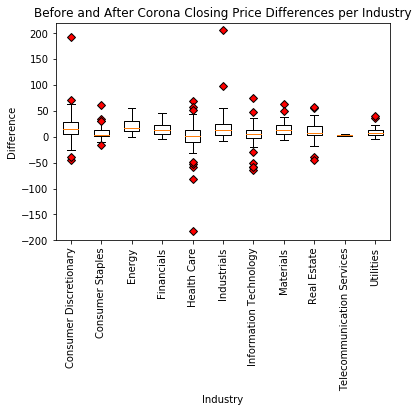

In [337]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Before and After Corona Closing Price Differences per Industry')
ax1.set_ylabel('Difference')
ax1.set_xlabel('Industry')
plt.xticks(rotation=90)
plt.ylim(-200,220)
red_diamond = dict(markerfacecolor='r', marker='D')
diffList = []
for sec in sectors:
    partialDf = stocks_df.loc[stocks_df['Sector'] == sec]
    diffs = partialDf["Difference"]
    diffList.append(diffs)
ax1.boxplot(diffList, labels=sectors, flierprops=red_diamond)
plt.show()